
    
<p> <center><font color = "#7b4ee6" size =1000px><b>California House Price Prediction Project</h1>

### <font color ="red"> Import Required Libraries

In [17]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt,style
import seaborn as sns
import re


ModuleNotFoundError: No module named 'seaborn'

### <font color ="red"> Import Dataset
    

In [ ]:
df_house = pd.read_excel("housing.xlsx")

# <font color ="red"> Data Cleaning
    

In [ ]:
# view top 5 rows of data set
df_house.head()

In [4]:
# describe numerical data 
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#describe categorical data
df_house.describe(include=["object"])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [6]:
# check for Na Values and dtype of each column
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
# Check For Null Values 
df_house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
# Filling total_bedroomes null values with mean value
df_house.fillna(np.mean(df_house.total_bedrooms),inplace=True)

In [9]:
# recheck
df_house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
# check for duplicates
df_house.duplicated().sum()

0

# <font color ="red"> Data Preparation
    

In [11]:
# Checking For Categories 

df_house.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
# Convert ocean_Proximity to numeric Value

df_house = pd.get_dummies(data =df_house, columns=["ocean_proximity"])

In [13]:
# Check Result
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [14]:
# Check if any categorical variable left
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

# <font color ="red"> <b>Model Building 
    

### <font color="#057480">Import Required Libraries

In [15]:
# import Required Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### <font color="#057480">Instantiate Estimators

In [16]:
# Standard Scalar Object

stdScalar = StandardScaler()

# Linear Estimator Object

LineRegg = LinearRegression()


### <font color="#057480">Select Features And Target Variables

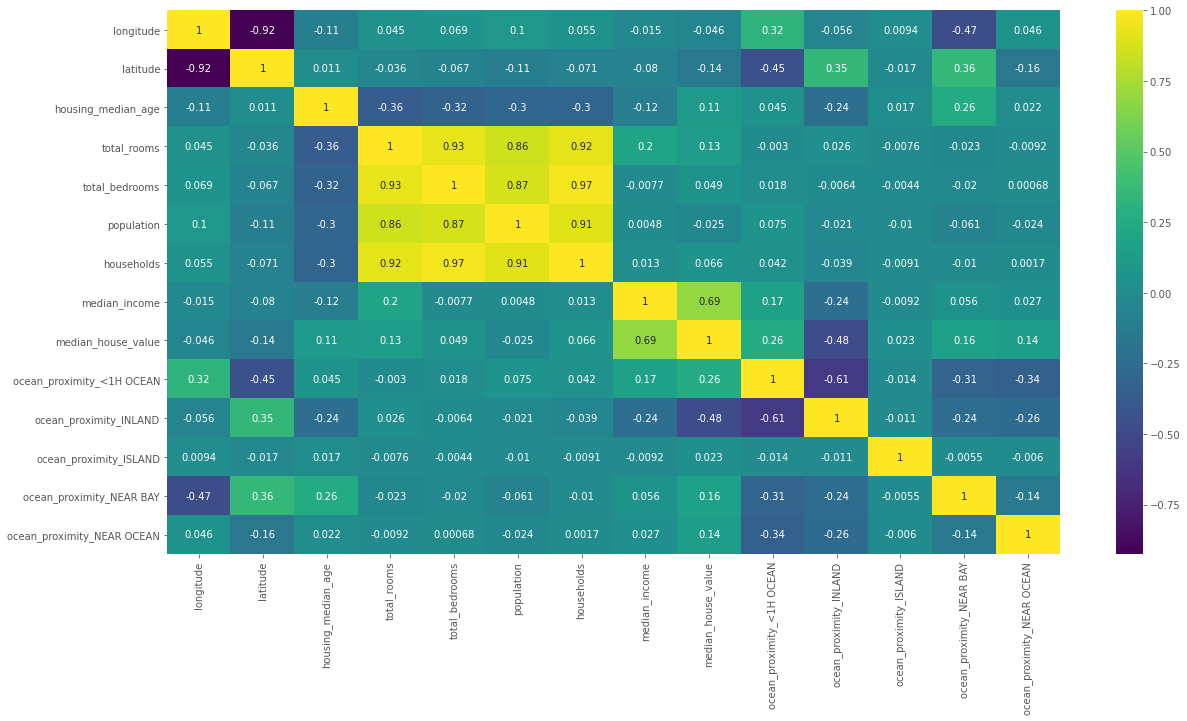

In [17]:
# check for correlations

style.use('ggplot')
plt.figure(figsize=(20,10))
sns.heatmap(df_house.corr(), annot = True, cmap = "viridis")
plt.show()

In [18]:
# Select Features and target

x = df_house.drop(columns="median_house_value")
y = df_house[['median_house_value']]

### <font color="#057480">Split the data into 80% training dataset and 20% test dataset.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, train_size = 0.8, random_state = 1)

In [20]:
# Confirm The Split
print("Train Size : ",x_train.shape)
print("Test Size  : ",x_test.shape)

Train Size :  (16512, 13)
Test Size  :  (4128, 13)


### <font color="#057480">Standardize training and test datasets.

In [21]:
# train object
stdScalar.fit(x_train)

StandardScaler()

In [22]:
#tranform and get standardized value for train and test
x_train_std = stdScalar.transform(x_train)
x_test_std = stdScalar.transform(x_test)

### <font color="#057480">Perform Linear Regression on training data.

In [23]:
# TRAIN THE MODEL

LineRegg.fit(x_train_std,y_train)

LinearRegression()

In [24]:
# Test Training and Testing Score
print("Train Score : ", LineRegg.score(x_train_std,y_train))
print("Test Score  : ", LineRegg.score(x_test_std,y_test))

Train Score :  0.6471768442653696
Test Score  :  0.6375631694383719


### <font color="#057480">Predict output for test dataset using the fitted model.

In [25]:
Predicted=pd.DataFrame(LineRegg.predict(x_test_std))

### <font color="#057480">Print root mean squared error (RMSE) from Linear Regression.

In [26]:
# Import Required Libraries 
from sklearn.metrics import mean_squared_error


In [27]:
print(np.sqrt(mean_squared_error(y_test,Predicted)))
print(np.sqrt(mean_squared_error(y_train,LineRegg.predict(x_train))))

68949.62451074278
75915560.86037831


(0.0, 510000.0)

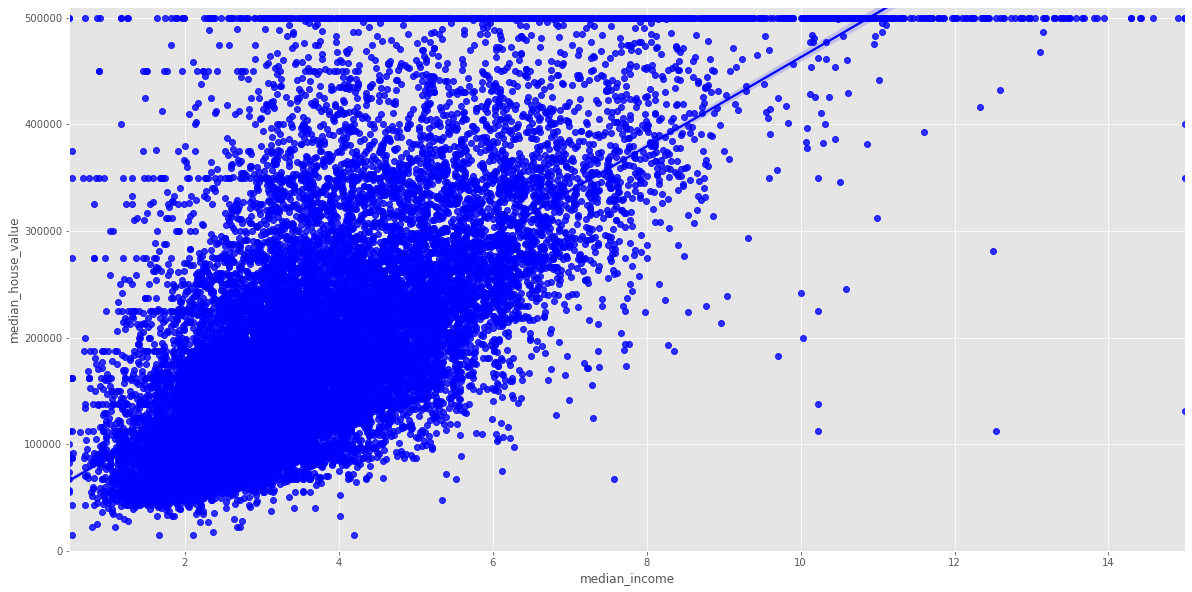

In [55]:
plt.figure(figsize=(20,10))
sns.regplot(data = df_house, x = 'median_income', y = 'median_house_value', marker ='o', color = "b")
plt.ylim(0,510000)

# <font color ="red"> <b> Bonus exercise: Perform Linear Regression with one independent variable :
    

### <font color="#057480">Extract just the median_income column from the independent variables (from x_train and x_test).

In [28]:
x_single_train = x_train[['median_income']].copy()
x_single_test = x_test[['median_income']].copy()

### <font color="#057480">Perform Linear Regression to predict housing values based on median_income.

In [29]:
# Instantiate Estimator
lineRegg_single = LinearRegression()

In [30]:
# Train Model
lineRegg_single.fit(x_single_train, y_train)

LinearRegression()

### <font color="#057480">Predict output for test dataset using the fitted model.

In [31]:
y_pred_single = lineRegg_single.predict(x_single_test)

### <font color="#057480">Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

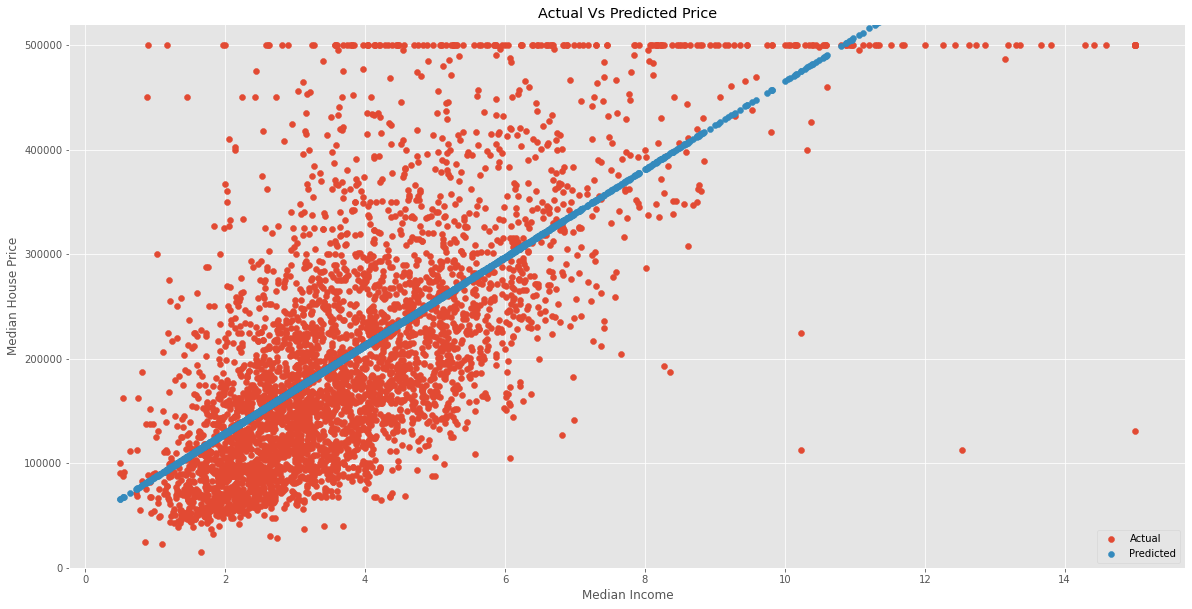

In [34]:
plt.figure(figsize=(20,10))
plt.scatter(x_single_test,y_test, label = "Actual")
plt.scatter(x_single_test,y_pred_single, label = "Predicted")
plt.xlabel("Median Income")
plt.ylabel("Median House Price")
plt.title("Actual Vs Predicted Price")
plt.ylim(0,520000)
plt.legend(loc ="lower right")
plt.show()

In [39]:
# Test Training and Testing Score
print("Train Score : ", lineRegg_single.score(x_single_train,y_train))
print("Test Score  : ", lineRegg_single.score(x_single_test,y_test))

Train Score :  0.4736104113554326
Test Score  :  0.4719083593446771


In [42]:
#RMSE Score
print(np.sqrt(mean_squared_error(y_test,y_pred_single)))
print(np.sqrt(mean_squared_error(y_train,lineRegg_single.predict(x_single_train))))

83228.17849797675
83864.426187912
